<a href="https://colab.research.google.com/github/Uchiha67/Prediction-of-HTC-using-nanofluids/blob/main/SVM_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import time
import tensorflow as tf
from scipy.io import FortranFile
import random
import math
import itertools
from sklearn import model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from scipy import stats

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, r2_score, f1_score,mean_squared_error

from sklearn.svm import SVR

from numpy.random import seed
seed(1)
# Import PyTorch libraries
import torch
from torch import nn

# Import visualization library
import matplotlib.pyplot as plt
import seaborn as sns
# Verify PyTorch version
torch.__version__


'2.0.1+cu118'

In [ ]:
# Check to see if we have a GPU to use for training
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('A {} device was detected.'.format(device))

# Print the name of the cuda device, if detected
if device=='cuda':
    print (torch.cuda.get_device_name(device=device))

A cpu device was detected.


In [ ]:
df = pd.read_excel('FINAL SHEET.xlsx', sheet_name='Database')

# Explore the first 10 rows of the dataset
df.head(10)

,Base Fluid,Nano Particle,Mass Fraction,Reynold No.,Density of nanofluid (kg/m3),Specific heat-nano fluid ( J/kg K),Thermal conductivity-nanofluid(W/mK),Dynamic viscocity- nanofluid (Kg/m3),Heat Transfer Coefficient ( W/m2K),Source
0,EG/water (60:40),Aluminium oxide(AL2O3),0.02,8783.31970,1125.361821,51.749852,0.407062,3.305239,5157.85548,Development of new correlations for convective...
1,EG/water (60:40),Aluminium oxide(AL2O3),0.02,9068.43394,1126.321689,51.699119,0.405898,3.469004,5386.48670,Development of new correlations for convective...
2,EG/water (60:40),Aluminium oxide(AL2O3),0.02,9502.58516,1127.473481,51.638214,0.404448,3.682849,5694.79243,Development of new correlations for convective...
3,EG/water (60:40),Aluminium oxide(AL2O3),0.02,9858.97795,1128.604730,51.578358,0.402965,3.913629,6041.20337,Development of new correlations for convective...
4,EG/water (60:40),Aluminium oxide(AL2O3),0.02,10001.53506,1129.272011,51.543029,0.402062,4.060538,6269.83459,Development of new correlations for convective...
5,EG/water (60:40),Aluminium oxide(AL2O3),0.02,10435.68628,1129.893939,51.510085,0.401199,4.205375,6501.92992,Development of new correlations for convective...
6,EG/water (60:40),Aluminium oxide(AL2O3),0.02,10792.07907,1130.458271,51.480176,0.400399,4.343913,6730.56113,Development of new correlations for convective...
7,EG/water (60:40),Aluminium oxide(AL2O3),0.02,11077.19331,1131.152680,51.443351,0.399391,4.524415,7038.86687,Development of new correlations for convective...
8,EG/water (60:40),Aluminium oxide(AL2O3),0.02,11368.78741,1131.547908,51.422380,0.398806,4.632445,7229.39288,Development of new correlations for convective...
9,EG/water (60:40),Aluminium oxide(AL2O3),0.02,11582.62308,1131.926505,51.402282,0.398236,4.739760,7423.38301,Development of new correlations for convective...


In [ ]:
cormat = df.corr()
round(cormat,2)

<ipython-input-4-c450962e4570>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = df.corr()


,Mass Fraction,Reynold No.,Density of nanofluid (kg/m3),Specific heat-nano fluid ( J/kg K),Thermal conductivity-nanofluid(W/mK),Dynamic viscocity- nanofluid (Kg/m3),Heat Transfer Coefficient ( W/m2K)
Mass Fraction,1.00,-0.36,0.86,-0.18,0.81,-0.37,-0.47
Reynold No.,-0.36,1.00,-0.28,0.34,-0.20,-0.05,0.94
Density of nanofluid (kg/m3),0.86,-0.28,1.00,-0.21,0.89,-0.27,-0.36
Specific heat-nano fluid ( J/kg K),-0.18,0.34,-0.21,1.00,-0.04,-0.70,0.37
Thermal conductivity-nanofluid(W/mK),0.81,-0.20,0.89,-0.04,1.00,-0.35,-0.28
Dynamic viscocity- nanofluid (Kg/m3),-0.37,-0.05,-0.27,-0.70,-0.35,1.00,-0.02
Heat Transfer Coefficient ( W/m2K),-0.47,0.94,-0.36,0.37,-0.28,-0.02,1.00


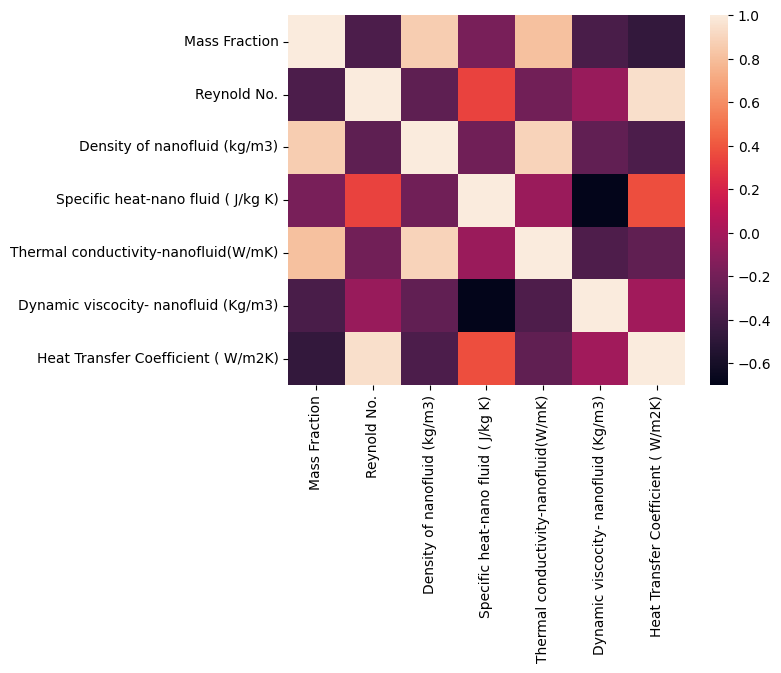

In [ ]:
sns.heatmap(cormat);

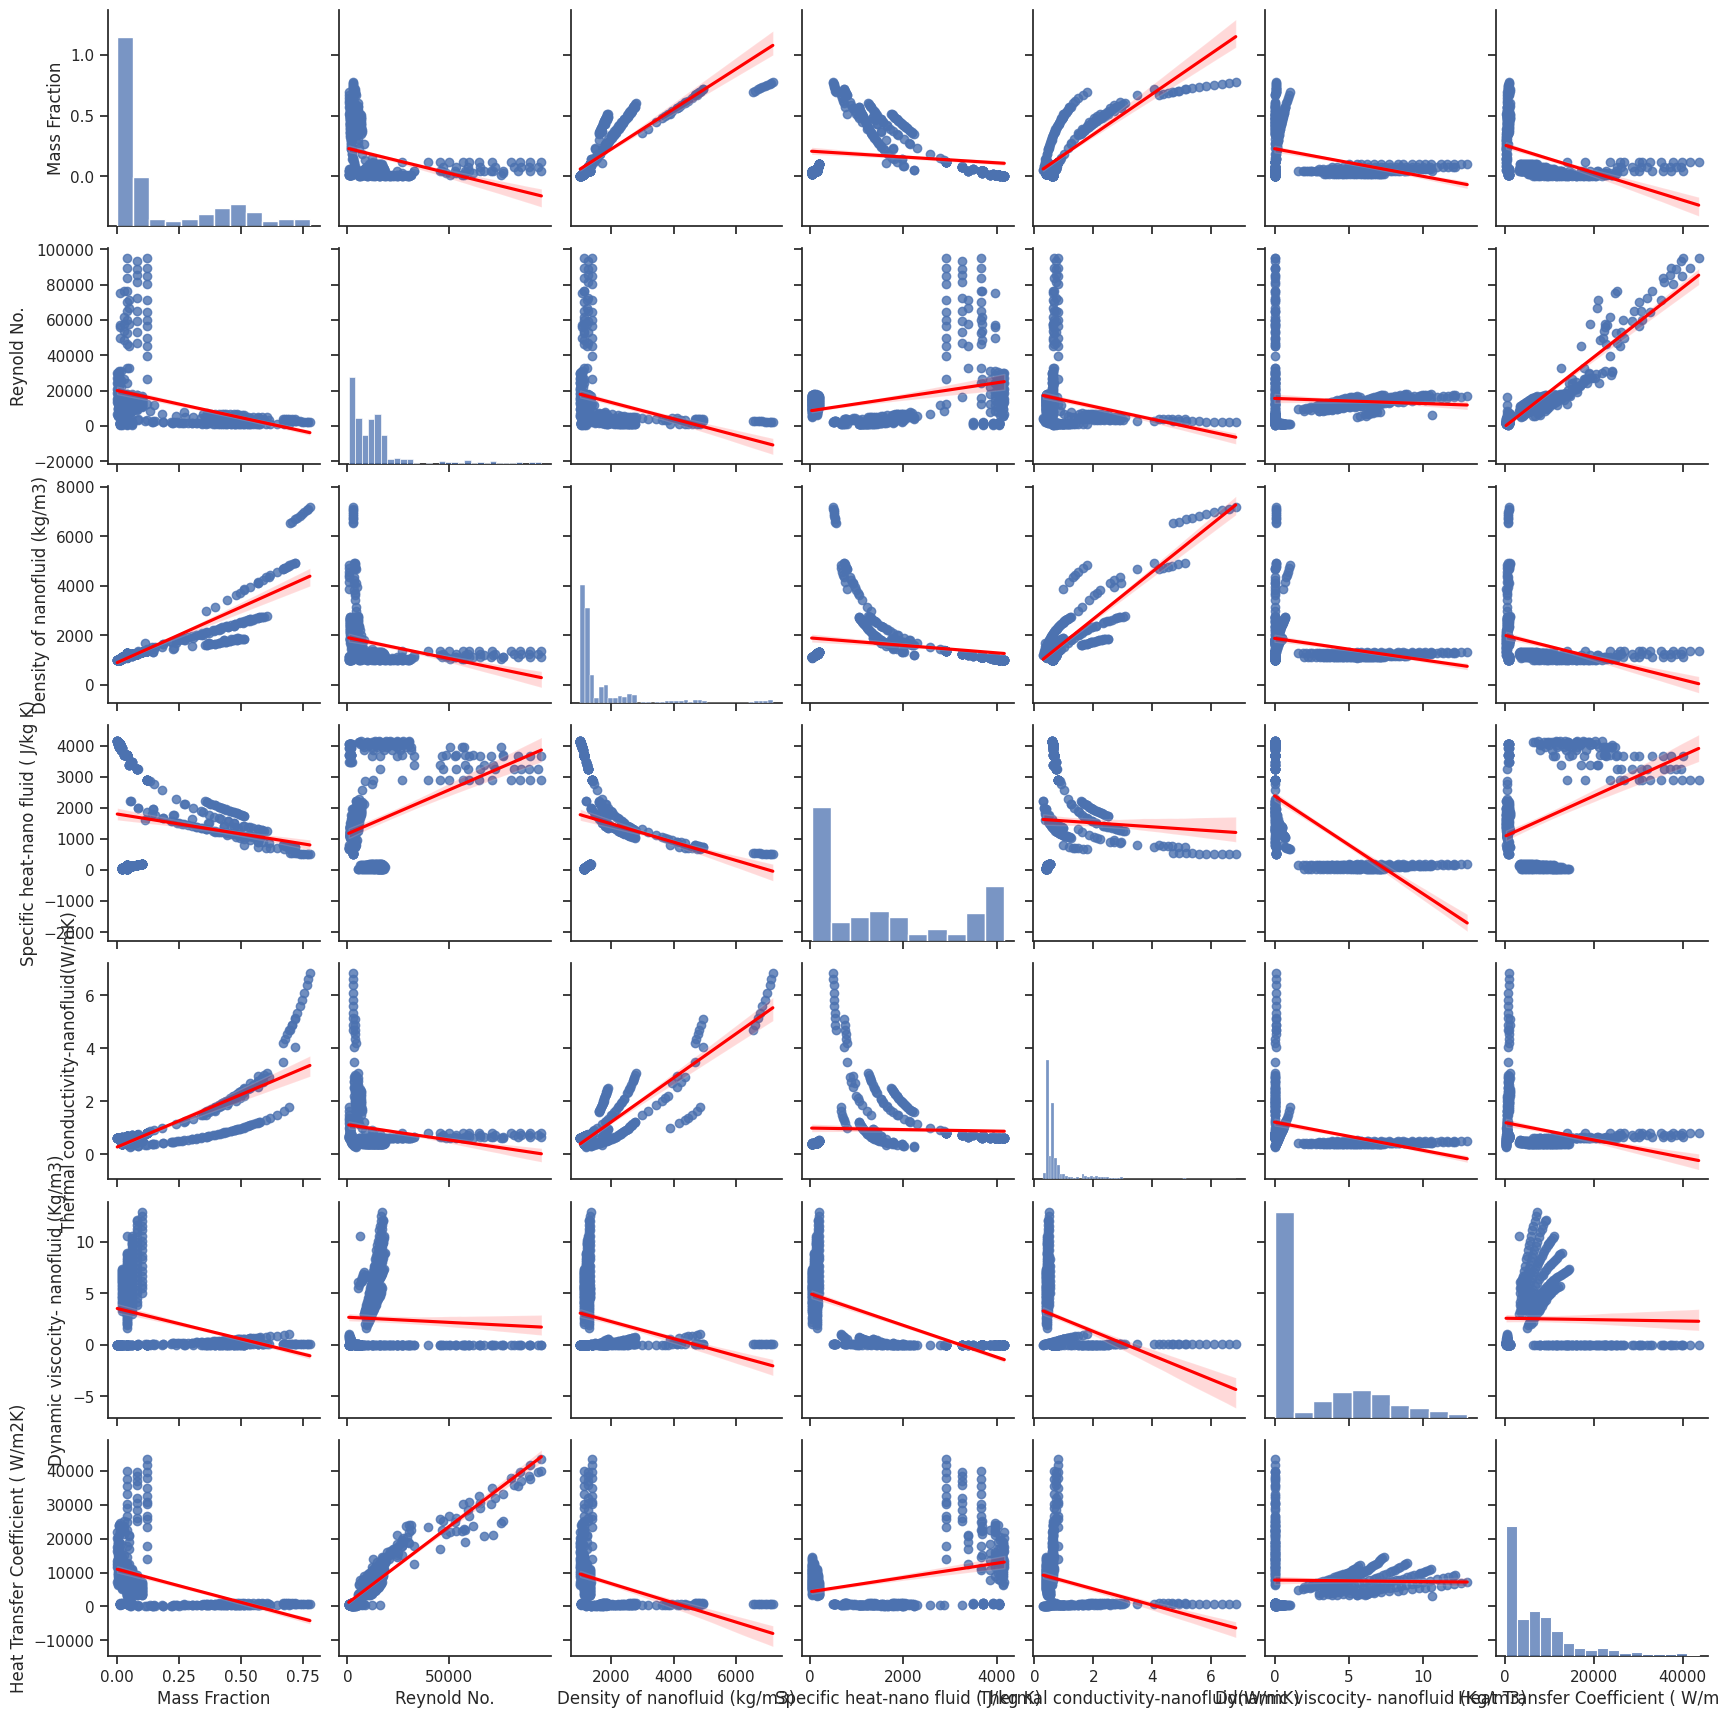

In [ ]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

In [ ]:
data=pd.get_dummies(df, columns=["Base Fluid", "Nano Particle"], prefix=["Base_fluid_en", "Nano_particle_en"])
data = data.drop('Source', axis=1)
data.head()

,Mass Fraction,Reynold No.,Density of nanofluid (kg/m3),Specific heat-nano fluid ( J/kg K),Thermal conductivity-nanofluid(W/mK),Dynamic viscocity- nanofluid (Kg/m3),Heat Transfer Coefficient ( W/m2K),Base_fluid_en_EG/water (60:40),Base_fluid_en_Ethylene Glycol,Base_fluid_en_Water,Nano_particle_en_(SIO2),Nano_particle_en_Aluminium,Nano_particle_en_Aluminium Oxide,Nano_particle_en_Aluminium oxide(AL2O3),Nano_particle_en_Copper,Nano_particle_en_Copper Oxide,Nano_particle_en_Titanium Dioxide,Nano_particle_en_Zirconium Dioxide
0,0.02,8783.31970,1125.361821,51.749852,0.407062,3.305239,5157.85548,1,0,0,0,0,0,1,0,0,0,0
1,0.02,9068.43394,1126.321689,51.699119,0.405898,3.469004,5386.48670,1,0,0,0,0,0,1,0,0,0,0
2,0.02,9502.58516,1127.473481,51.638214,0.404448,3.682849,5694.79243,1,0,0,0,0,0,1,0,0,0,0
3,0.02,9858.97795,1128.604730,51.578358,0.402965,3.913629,6041.20337,1,0,0,0,0,0,1,0,0,0,0
4,0.02,10001.53506,1129.272011,51.543029,0.402062,4.060538,6269.83459,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Check the size/shape of our dataset
data.shape


(472, 18)

In [ ]:
data.corr(method ='pearson')

,Mass Fraction,Reynold No.,Density of nanofluid (kg/m3),Specific heat-nano fluid ( J/kg K),Thermal conductivity-nanofluid(W/mK),Dynamic viscocity- nanofluid (Kg/m3),Heat Transfer Coefficient ( W/m2K),Base_fluid_en_EG/water (60:40),Base_fluid_en_Ethylene Glycol,Base_fluid_en_Water,Nano_particle_en_(SIO2),Nano_particle_en_Aluminium,Nano_particle_en_Aluminium Oxide,Nano_particle_en_Aluminium oxide(AL2O3),Nano_particle_en_Copper,Nano_particle_en_Copper Oxide,Nano_particle_en_Titanium Dioxide,Nano_particle_en_Zirconium Dioxide
Mass Fraction,1.000000,-0.355654,0.861702,-0.176085,0.812751,-0.367393,-0.470313,-0.454606,0.395283,0.170501,-0.148282,0.318044,0.264251,-0.332045,0.397241,-0.045609,-0.119919,-0.125297
Reynold No.,-0.355654,1.000000,-0.281253,0.336198,-0.203884,-0.053806,0.944388,-0.077384,-0.292622,0.279239,-0.050646,-0.177433,-0.355727,-0.037156,-0.099692,-0.053061,0.722767,0.400734
Density of nanofluid (kg/m3),0.861702,-0.281253,1.000000,-0.211324,0.890238,-0.268841,-0.356835,-0.325968,0.221954,0.164996,-0.117955,0.008966,0.087286,-0.247711,0.696102,0.100229,-0.105668,-0.091534
Specific heat-nano fluid ( J/kg K),-0.176085,0.336198,-0.211324,1.000000,-0.042826,-0.699187,0.369562,-0.772329,-0.060107,0.798325,-0.242751,0.051576,0.223291,-0.584684,-0.101531,0.225846,0.310645,0.255210
Thermal conductivity-nanofluid(W/mK),0.812751,-0.203884,0.890238,-0.042826,1.000000,-0.352913,-0.279602,-0.401114,-0.066208,0.438941,-0.128383,0.165524,0.051231,-0.299294,0.686187,0.052895,-0.058690,-0.058575
Dynamic viscocity- nanofluid (Kg/m3),-0.367393,-0.053806,-0.268841,-0.699187,-0.352913,1.000000,-0.017497,0.889517,-0.255480,-0.693714,0.153051,-0.216212,-0.372763,0.812011,-0.106693,-0.202322,-0.211186,-0.139847
Heat Transfer Coefficient ( W/m2K),-0.470313,0.944388,-0.356835,0.369562,-0.279602,-0.017497,1.000000,-0.028095,-0.337185,0.261939,0.000910,-0.244107,-0.431272,-0.017649,-0.116816,0.089532,0.700498,0.273992
Base_fluid_en_EG/water (60:40),-0.454606,-0.077384,-0.325968,-0.772329,-0.401114,0.889517,-0.028095,1.000000,-0.325149,-0.753502,0.299396,-0.245393,-0.428713,0.760456,-0.118646,-0.133873,-0.228227,-0.151061
Base_fluid_en_Ethylene Glycol,0.395283,-0.292622,0.221954,-0.060107,-0.066208,-0.255480,-0.337185,-0.325149,1.000000,-0.376721,-0.097348,0.206337,0.419435,-0.247262,-0.059318,-0.110010,-0.114104,-0.075524
Base_fluid_en_Water,0.170501,0.279239,0.164996,0.798325,0.438941,-0.693714,0.261939,-0.753502,-0.376721,1.000000,-0.225595,0.096925,0.128346,-0.573006,0.157459,0.207617,0.302888,0.200478


In [ ]:
# Importing the library
import sklearn
from sklearn import preprocessing as per
# define Normalizer
scaler = per.Normalizer()

# transform data
scaled_data = scaler.fit_transform(data)
scaled_data=pd.DataFrame(scaled_data,index=data.index,columns=data.columns)


In [ ]:
scaled_data.shape

(472, 18)

In [ ]:
scaled_data.head(10)

,Mass Fraction,Reynold No.,Density of nanofluid (kg/m3),Specific heat-nano fluid ( J/kg K),Thermal conductivity-nanofluid(W/mK),Dynamic viscocity- nanofluid (Kg/m3),Heat Transfer Coefficient ( W/m2K),Base_fluid_en_EG/water (60:40),Base_fluid_en_Ethylene Glycol,Base_fluid_en_Water,Nano_particle_en_(SIO2),Nano_particle_en_Aluminium,Nano_particle_en_Aluminium Oxide,Nano_particle_en_Aluminium oxide(AL2O3),Nano_particle_en_Copper,Nano_particle_en_Copper Oxide,Nano_particle_en_Titanium Dioxide,Nano_particle_en_Zirconium Dioxide
0,0.000002,0.857085,0.109814,0.005050,0.000040,0.000323,0.503309,0.000098,0.0,0.0,0.0,0.0,0.0,0.000098,0.0,0.0,0.0,0.0
1,0.000002,0.854896,0.106180,0.004874,0.000038,0.000327,0.507793,0.000094,0.0,0.0,0.0,0.0,0.0,0.000094,0.0,0.0,0.0,0.0
2,0.000002,0.853345,0.101249,0.004637,0.000036,0.000331,0.511400,0.000090,0.0,0.0,0.0,0.0,0.0,0.000090,0.0,0.0,0.0,0.0
3,0.000002,0.848614,0.097145,0.004440,0.000035,0.000337,0.519998,0.000086,0.0,0.0,0.0,0.0,0.0,0.000086,0.0,0.0,0.0,0.0
4,0.000002,0.843420,0.095230,0.004347,0.000034,0.000342,0.528729,0.000084,0.0,0.0,0.0,0.0,0.0,0.000084,0.0,0.0,0.0,0.0
5,0.000002,0.845174,0.091509,0.004172,0.000032,0.000341,0.526583,0.000081,0.0,0.0,0.0,0.0,0.0,0.000081,0.0,0.0,0.0,0.0
6,0.000002,0.845171,0.088531,0.004032,0.000031,0.000340,0.527097,0.000078,0.0,0.0,0.0,0.0,0.0,0.000078,0.0,0.0,0.0,0.0
7,0.000002,0.840891,0.085868,0.003905,0.000030,0.000343,0.534334,0.000076,0.0,0.0,0.0,0.0,0.0,0.000076,0.0,0.0,0.0,0.0
8,0.000001,0.840873,0.083693,0.003803,0.000029,0.000343,0.534709,0.000074,0.0,0.0,0.0,0.0,0.0,0.000074,0.0,0.0,0.0,0.0
9,0.000001,0.839083,0.082000,0.003724,0.000029,0.000343,0.537774,0.000072,0.0,0.0,0.0,0.0,0.0,0.000072,0.0,0.0,0.0,0.0


In [ ]:
 # First dataframe with 80% of the rows
train= scaled_data.sample(frac=0.8, random_state=20) 
 # Second dataframe with the remaining rows
test = scaled_data.drop(train.index)

In [ ]:
train.shape

(378, 18)

In [ ]:
test.shape

(94, 18)

In [ ]:
import pandas as pd
import numpy as np
import math
import itertools
import matplotlib.pyplot as plt

from sklearn import model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from scipy import stats


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, r2_score, f1_score,mean_squared_error

from sklearn.svm import SVR

from numpy.random import seed
seed(1)

In [ ]:
def complete_model(trainx, trainy, testx, testy, model):
    model.fit(trainx, trainy)
    y_pred = model.predict(testx)
    return calculation(testy, y_pred)

In [ ]:
def calculation(y_test, y_pred):  
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=metrics.r2_score(y_test,y_pred)
    pcc=stats.pearsonr(y_test,y_pred)
    return [mse, rmse, r2, pcc[0],pcc[1]]

In [ ]:
def print_output(model_name, val, output_val):
    print('\033[1mOptimized {} model {} performance: \033[0m'.format(model_name, val))
    print("MSE:         {0:.3f}".format(output_val[0]))
    print("RMSE: {0:.3f}".format(output_val[1]))
    print("R2: {0:.3f}".format(output_val[2]))
    print("PCC:    {0:.3f}".format(output_val[3]))
    print("p-value:    {0:.3f}".format(output_val[4]))

In [ ]:
## Create training and test file
from sklearn.model_selection import train_test_split
X = train.iloc[:,1:].values
y = train.loc[:,'Heat Transfer Coefficient ( W/m2K)'].values
X[:] = np.nan_to_num(X)
y[:] = np.nan_to_num(y)

In [ ]:
X.shape


(378, 17)

In [ ]:
y.shape

(378,)

In [ ]:
X_val = test.iloc[:,1:].values
y_val = test.loc[:,'Heat Transfer Coefficient ( W/m2K)'].values

X_val[:] = np.nan_to_num(X_val)
y_val[:] = np.nan_to_num(y_val)

In [ ]:
X_val.shape

(94, 17)

In [ ]:
y_val.shape

(94,)

In [ ]:

column_names =  ['Range_val', 'Model_info','MAE', 'RMSE','R2', 'PCC','p-val']

In [ ]:
output  = pd.DataFrame(columns = column_names)

## Change the kernels; C and gamma values for model optimization
kernels = ['poly', 'rbf'] 
Cs = [0.01, 0.1, 1, 10, 100]
gammas = [0.1, 0.01, 0.001, 0.0001]

from sklearn.model_selection import RepeatedKFold

#kernels = ['rbf']
#Cs = [0.01,0.1]
#gammas = [0.1, 0.01]


param = [k for k in itertools.product(kernels, Cs, gammas)]

for i in range(len(param)):
    params=param[i]
    kernel, C, gamma = params[0], params[1], params[2]
    #cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    model = SVR(C=C, kernel=kernel, gamma=gamma)
    for j in range(100):
        param_name = 'svm_'+'param_'+str(i)+'_kernel_'+params[0]+'_C_'+str(params[1])+'_gamma_'+str(params[2])
        x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=j)
        output_val = complete_model(trainx=x_train, trainy=y_train, testx=x_test, testy=y_test, model=model)
        output.loc[len(output)] = [str(j), param_name, output_val[0], output_val[1], output_val[2], output_val[3],output_val[4]]

output.to_csv(r'''svm_training_metrics_all_10.csv''')

In [ ]:
### SVM
final_svm = SVR(C=100, kernel='rbf', gamma=0.01)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=62)
### Optimized SVM model training performance
print_output('SVM', 'training', complete_model(x_train, y_train, x_test, y_test, final_svm))
### Optimized SVM model testing performance
print_output('SVM', 'testing', complete_model(x_train, y_train, X_val, y_val, final_svm))

Optimized SVM model training performance: 
MSE:         0.002
RMSE: 0.048
R2: 0.930
PCC:    0.998
p-value:    0.000
Optimized SVM model testing performance: 
MSE:         0.003
RMSE: 0.054
R2: 0.928
PCC:    0.998
p-value:    0.000


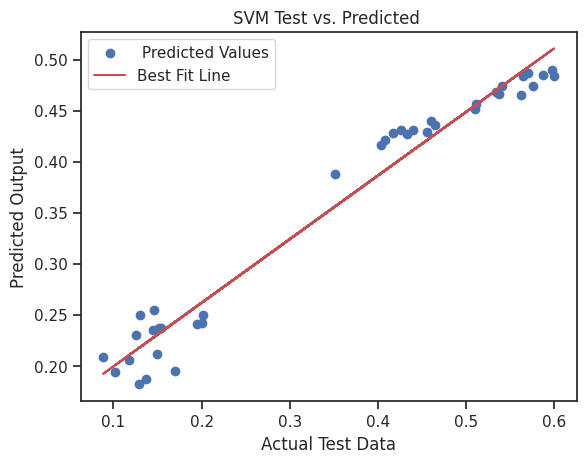

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# assume model is the trained ANN and y_test is the actual test data
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# plot the predicted values against the actual test data
slope, intercept = np.polyfit(y_test, y_pred, 1)

# plot the predicted values against the actual test data
plt.scatter(y_test, y_pred,label=' Predicted Values' )
plt.plot(y_test, slope*y_test + intercept, color='r', label='Best Fit Line')
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Output")
plt.title("SVM Test vs. Predicted ")
plt.legend()
plt.show()

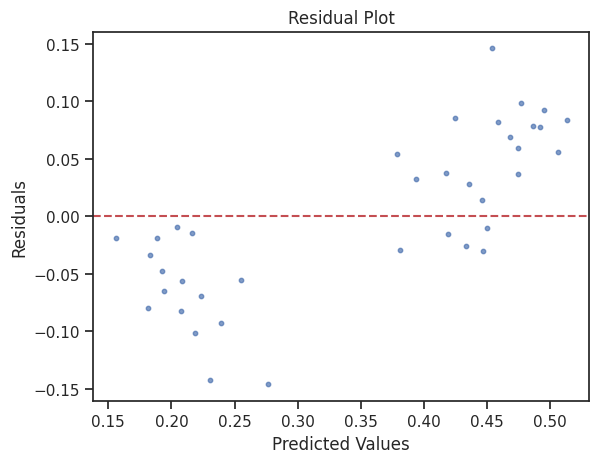

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# assume model is the trained ANN and y_test is the actual test data
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Calculate the residuals
residuals = y_test - y_pred

# Create duplicated or jittered data points
jittered_y_pred = y_pred + np.random.normal(0, 0.02, size=len(y_pred))
jittered_residuals = y_test - jittered_y_pred

# Create the residual plot with duplicated or jittered data points
plt.scatter(jittered_y_pred, jittered_residuals, alpha=0.7, s=10)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

